In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import mplfinance as mpf

%matplotlib inline

## 3D plots

In [2]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
strike[:2].round(1)
iv = (strike - 100) ** 2 / (100 * strike) / ttm
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

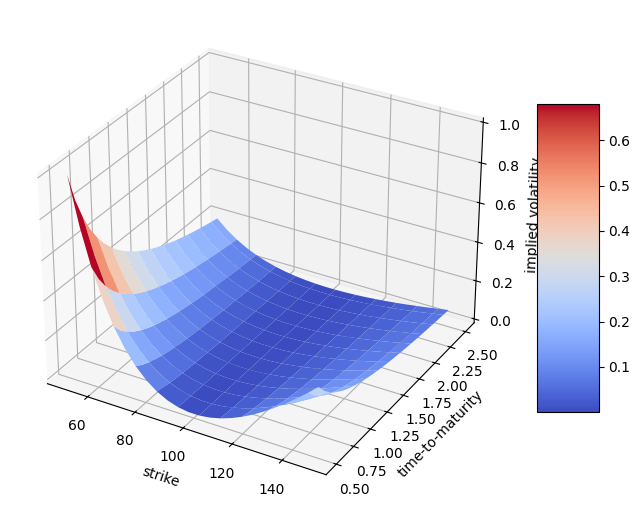

In [3]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 8))
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

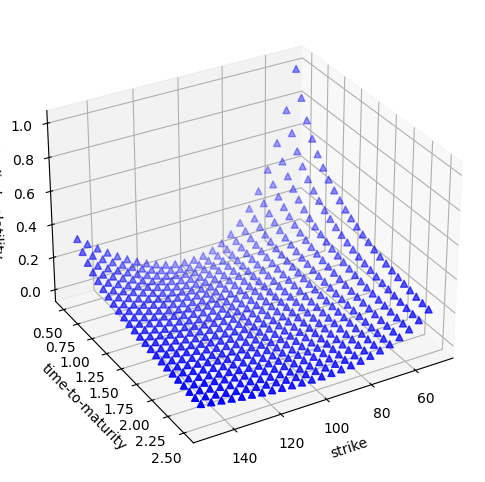

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');

## Financial plots

In [5]:
fxcm_eur_usd_eod = pd.read_csv('data/fxcm_eur_usd_eod_data.csv', index_col=0, parse_dates=True)
fxcm_eur_usd_eod.index.name = 'Datetime'
fxcm_eur_usd_eod.head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
Datetime,,,,,,,,
2013-01-01 22:00:00,1.31848,1.32935,1.31563,1.31850,1.31853,1.32940,1.31571,1.31860
2013-01-02 22:00:00,1.31850,1.31903,1.30468,1.30483,1.31860,1.31910,1.30471,1.30501
2013-01-03 22:00:00,1.30483,1.30897,1.29974,1.30679,1.30501,1.30898,1.29978,1.30697
2013-01-06 22:00:00,1.30679,1.31194,1.30168,1.31159,1.30697,1.31196,1.30168,1.31166
2013-01-07 22:00:00,1.31159,1.31398,1.30563,1.30805,1.31166,1.31400,1.30565,1.30815


In [6]:
fxcm_eur_usd_eod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1547 entries, 2013-01-01 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1547 non-null   float64
 1   BidHigh   1547 non-null   float64
 2   BidLow    1547 non-null   float64
 3   BidClose  1547 non-null   float64
 4   AskOpen   1547 non-null   float64
 5   AskHigh   1547 non-null   float64
 6   AskLow    1547 non-null   float64
 7   AskClose  1547 non-null   float64
dtypes: float64(8)
memory usage: 108.8 KB


In [7]:
quotes = fxcm_eur_usd_eod[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
quotes = quotes.iloc[-60:]
quotes.shape

(60, 4)

In [8]:
quotes.tail()

,AskOpen,AskHigh,AskLow,AskClose
Datetime,,,,
2017-12-25 22:00:00,1.18667,1.18791,1.18467,1.18587
2017-12-26 22:00:00,1.18587,1.19104,1.18552,1.18885
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


In [9]:
quotes.columns = ['Open', 'High', 'Low', 'Close']
quotes.head()

,Open,High,Low,Close
Datetime,,,,
2017-10-19 21:00:00,1.18539,1.18581,1.17625,1.17822
2017-10-21 21:00:00,1.17822,1.17822,1.17597,1.17655
2017-10-22 21:00:00,1.17655,1.17774,1.17248,1.17495
2017-10-23 21:00:00,1.17495,1.17930,1.17429,1.17622
2017-10-24 21:00:00,1.17622,1.18178,1.17532,1.18132


EUR/USD candle stick plot with moving average.

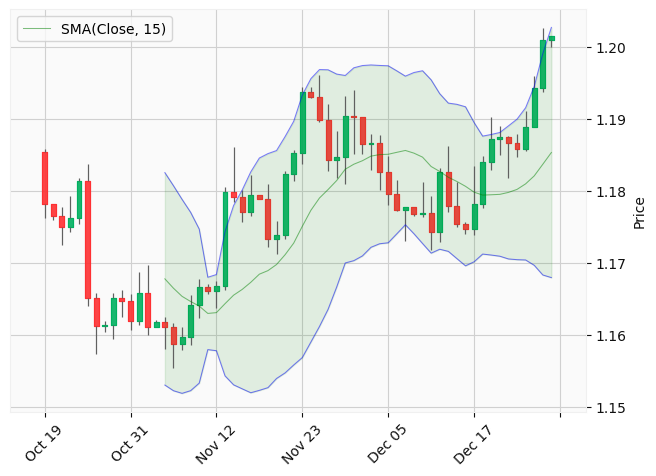

In [22]:
window = 15
std_dev = 2

quotes['SMA'] = quotes['Close'].rolling(window=window).mean()
quotes['STD'] = quotes['Close'].rolling(window=window).std()
quotes['UpperBand'] = quotes['SMA'] + (quotes['STD'] * std_dev)
quotes['LowerBand'] = quotes['SMA'] - (quotes['STD'] * std_dev)

line_width = .75
apds = [
    mpf.make_addplot(quotes['UpperBand'], color='blue', alpha=.5, width=line_width),
    mpf.make_addplot(quotes['LowerBand'], color='blue', alpha=.5, width=line_width),
    mpf.make_addplot(quotes['SMA'], label=f'SMA(Close, {window})', color='green', alpha=.5, width=line_width)
]

# fill in-between upper and lower band
fill=dict(y1=quotes['UpperBand'].values, y2=quotes['LowerBand'], alpha=.1, color='green')

mpf.plot(quotes, type='candle', addplot=apds, style='yahoo', fill_between=fill)